# HR Attrition Data Analysis

In this project, I will delve into the factors that influence employee attrition, specifically focusing on IBM employees. By examining the relationships between the **attrition variable** and other relevant variables, I aim to uncover patterns that shed light on the factors that contribute to employee resignations.

In [591]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

sns.set_theme()
sns.set_context('paper')

# Display the DataFrame with all columns
pd.set_option('display.max_columns', None)

### Exploration Data Analysis
Checking for null values, duplicates, etc

In [592]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1470 employees in the data and there's no null value in the data

In [594]:
duplicates = data.duplicated()
print("The number of duplilcate records:", duplicates.sum())

The number of duplilcate records: 0


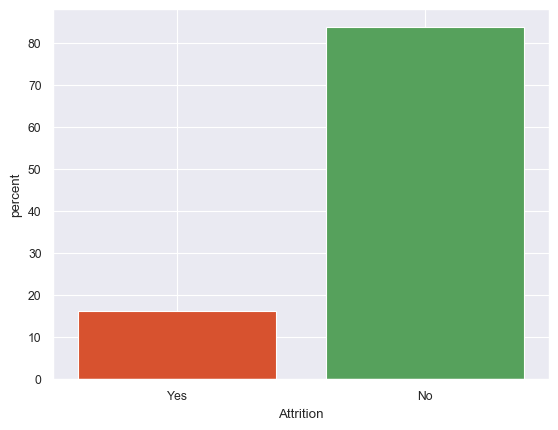

In [595]:
sns.countplot(x='Attrition', hue="Attrition", data=data, palette={'Yes': '#F34213', 'No':'#4AAD52'}, stat='percent')
plt.grid(True)
plt.show()

In [596]:
round(data['Attrition'].value_counts(normalize=True),2)

Attrition
No     0.84
Yes    0.16
Name: proportion, dtype: float64

Approximately 16% of the employees have resigned from their positions.

### Splitting Categorical and Numerical Variables

In [597]:
## Splitting columns to see the distribution of each 
categorical = [c for c in data.columns if data[c].dtypes == 'object']
numerical = [c for c in data.columns if data[c].dtypes == 'int64']
print(len(categorical))
print(len(numerical))

9
26


In [598]:
print(f"Categorical variables: {categorical}")
print(f"Numerical variables: {numerical}")

Categorical variables: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical variables: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [599]:
# Attrition is independent variable
categorical.remove('Attrition')

### Data Distribution
Let's examine the distribution of employees within the dataset.
Let's start from the categorical variables.

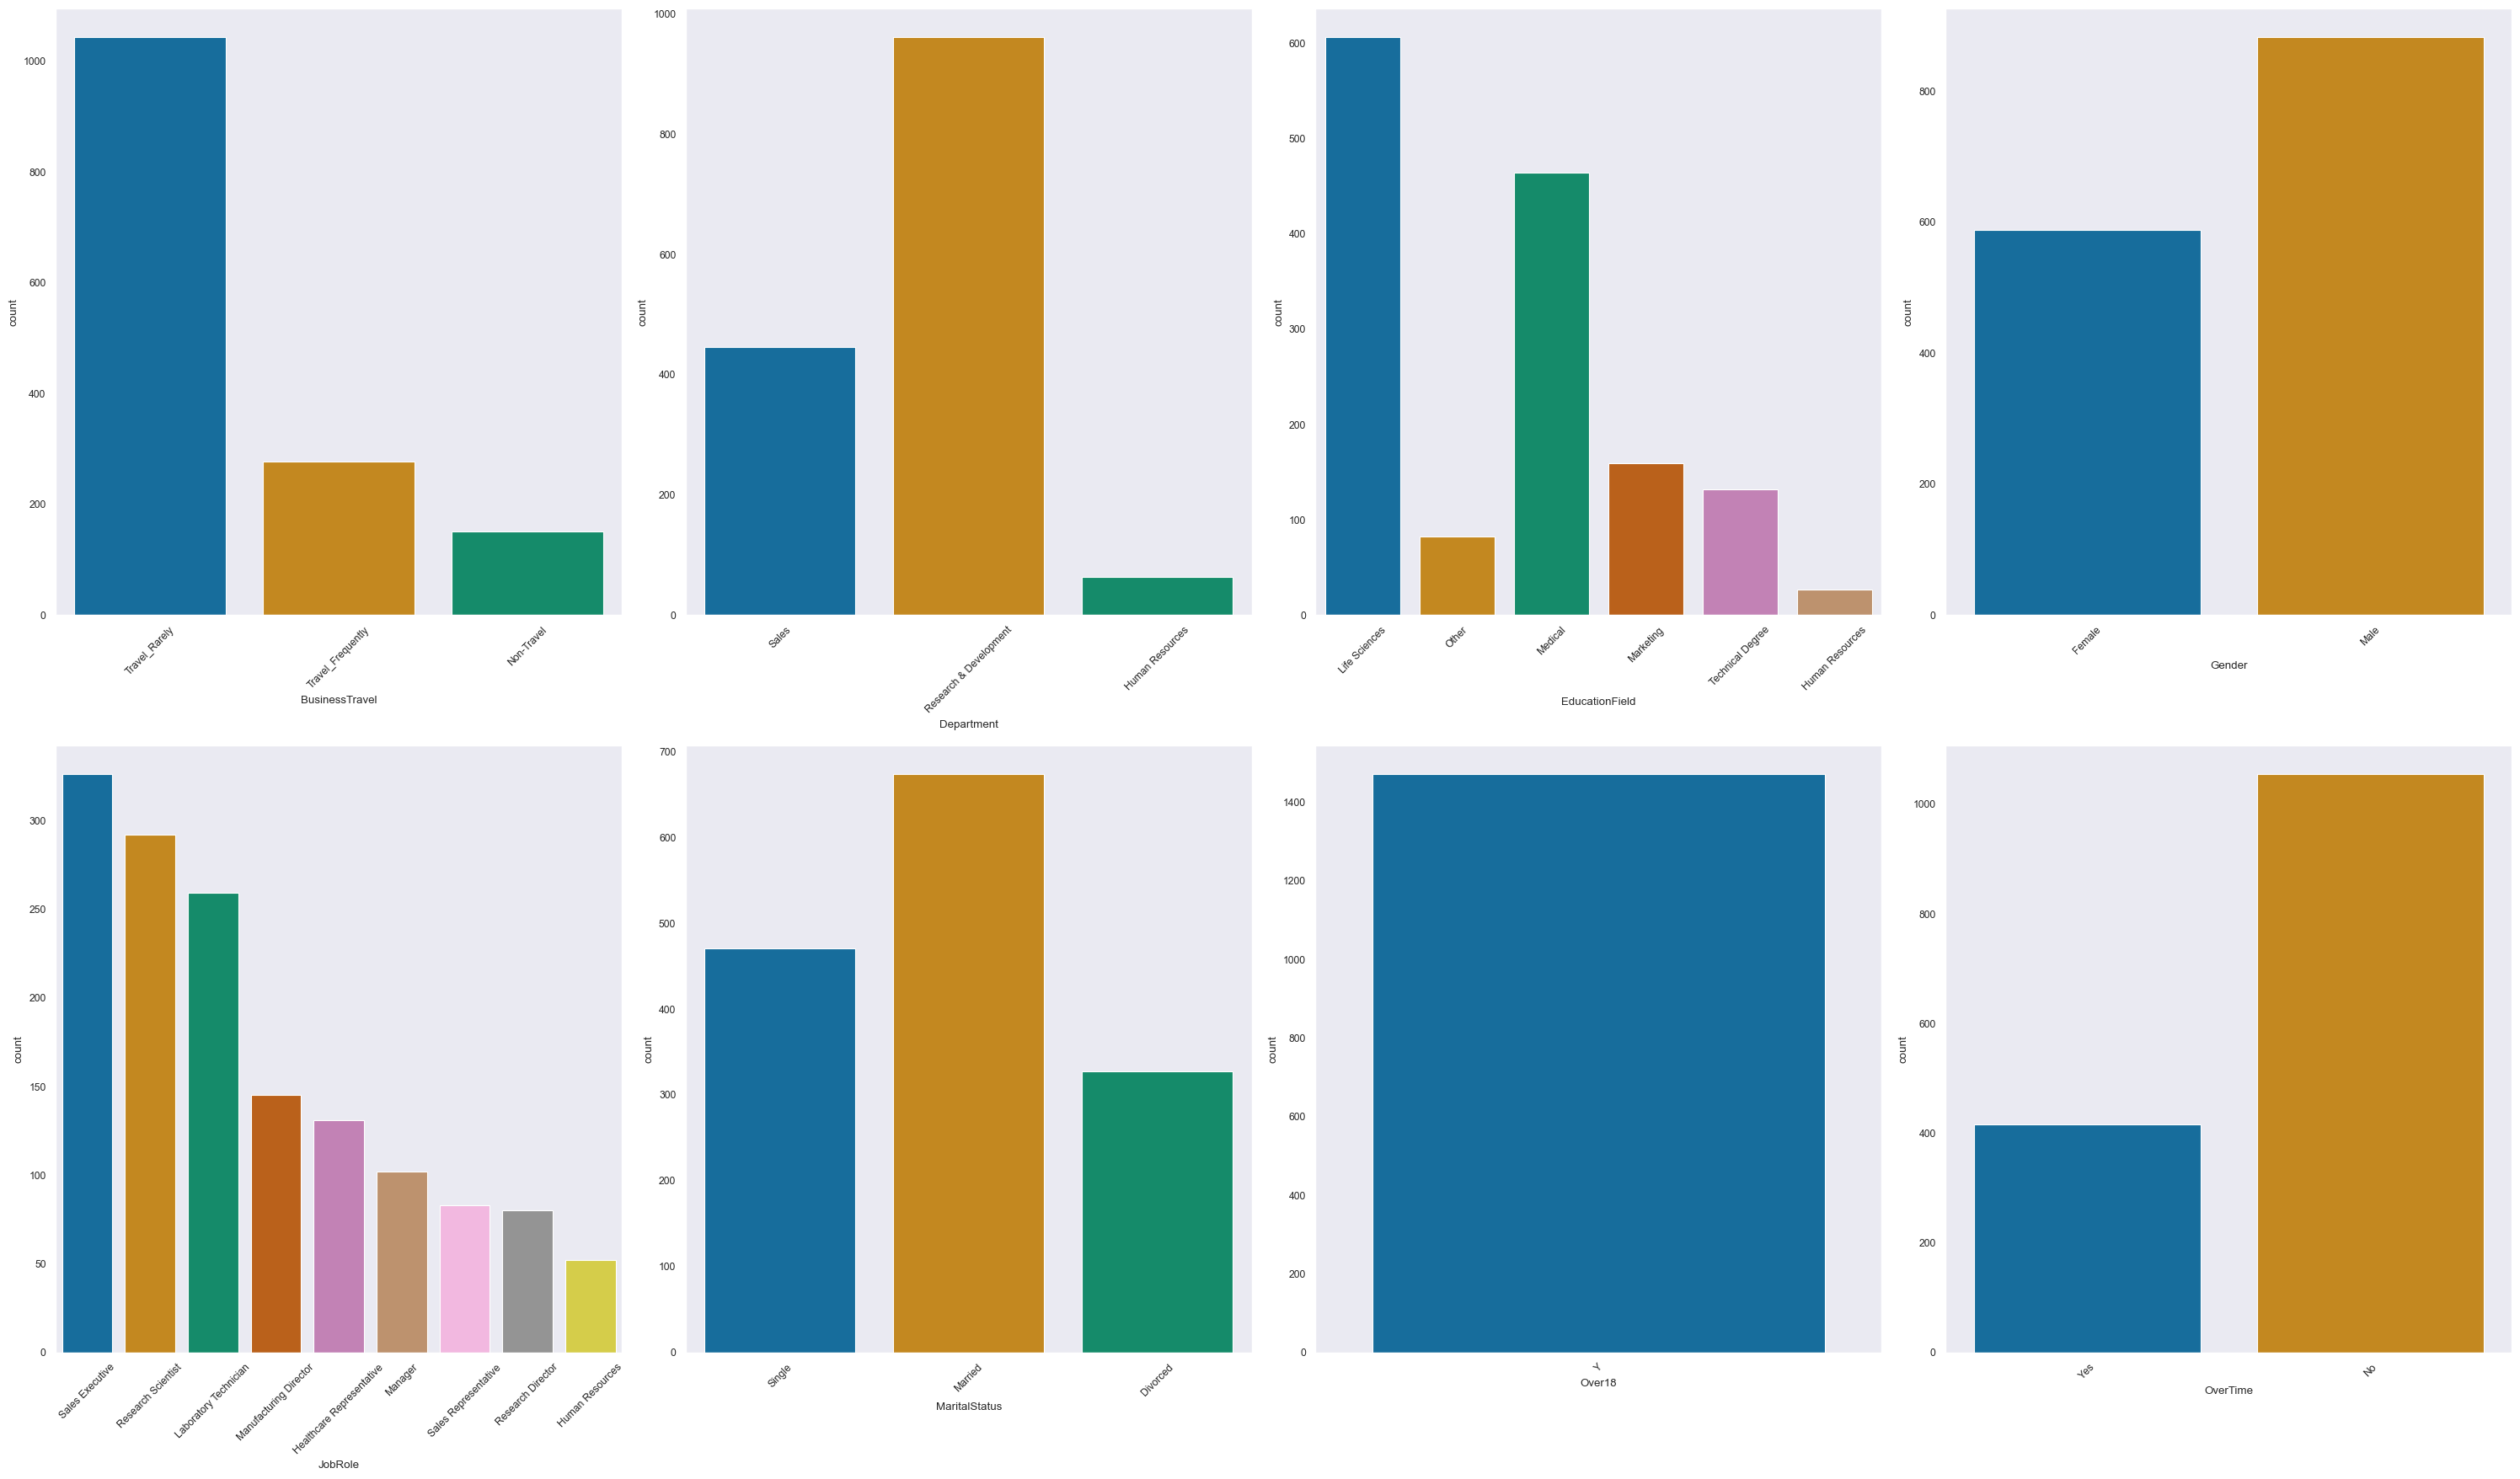

In [600]:
plt.figure(figsize=(30, 25))
for i, col in enumerate(categorical):
    plt.subplot(3, 4, i+1)
    sns.countplot(data=data, x=col, hue=col, palette="colorblind")
    plt.xticks(rotation = 45)
    plt.grid(False)

plt.tight_layout()
plt.show()

The graph clearly indicates that all employees are over the age of 18. Consequently, the variable `Over18` doesn't contribute any valuable information to the dataset. Hence, we'll remove this variable.

Additionally, the `Business Travel` variable can be categorized as ordinal due to its distinct values, namely 'Non-Travel' and 'Frequently', which indicate varying levels of business travel frequency.

In [601]:
categorical.remove('Over18')

data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely' : 1, 'Travel_Frequently':2})
categorical.remove('BusinessTravel')

Now, let's see the numerical variables distribution.

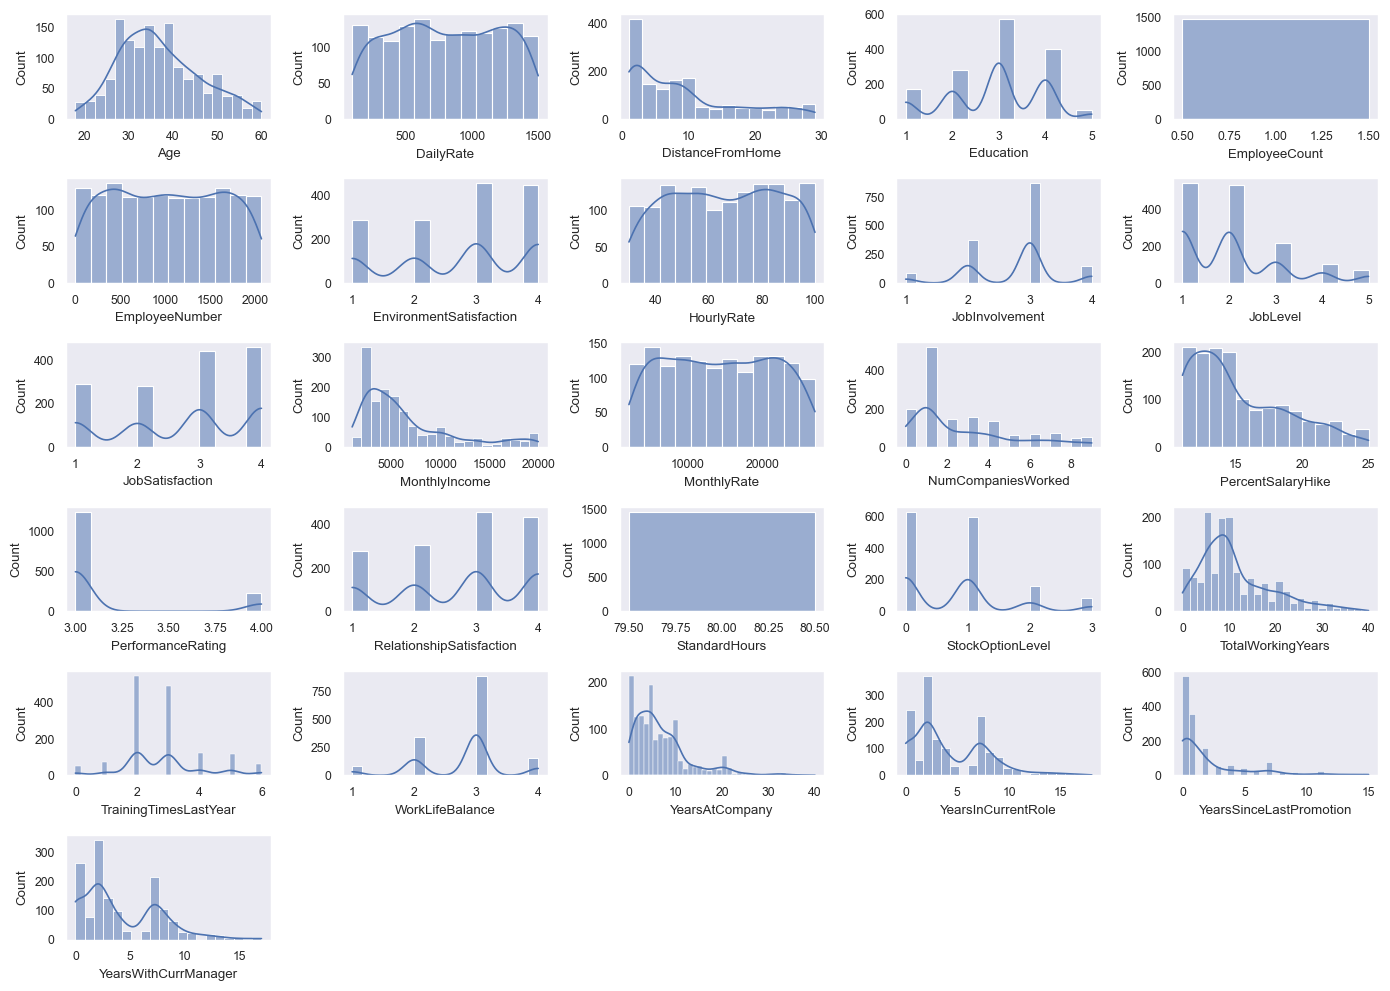

In [602]:
plt.figure(figsize=(14, 10))
for i in range(0, len(numerical)):
    plt.subplot(6, 5, i+1)
    sns.histplot(x=data[numerical].iloc[:, i],kde=True)
    plt.grid(False)

plt.tight_layout()
plt.show()

It appears most of the variables are not normally distributed. Also, certain variables are not continuous, but instead they might be considered as ordinal variables. 

In [603]:
ordinal = (['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                        'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                        'TrainingTimesLastYear', 'WorkLifeBalance'])
for c in ordinal:
    if c in numerical:
        numerical.remove(c)

Now we have three kinds of variables, `categorical`, `ordinal`, `numerical`

In [604]:
print(f'jumlah elemen dari categorical adalah {len(categorical)}')
print(f'jumlah elemen dari numerical adalah {len(numerical)}')
print(f'jumlah elemen dari ordinal adalah {len(ordinal)}')

jumlah elemen dari categorical adalah 6
jumlah elemen dari numerical adalah 15
jumlah elemen dari ordinal adalah 12


### Analysing Numerical Variables

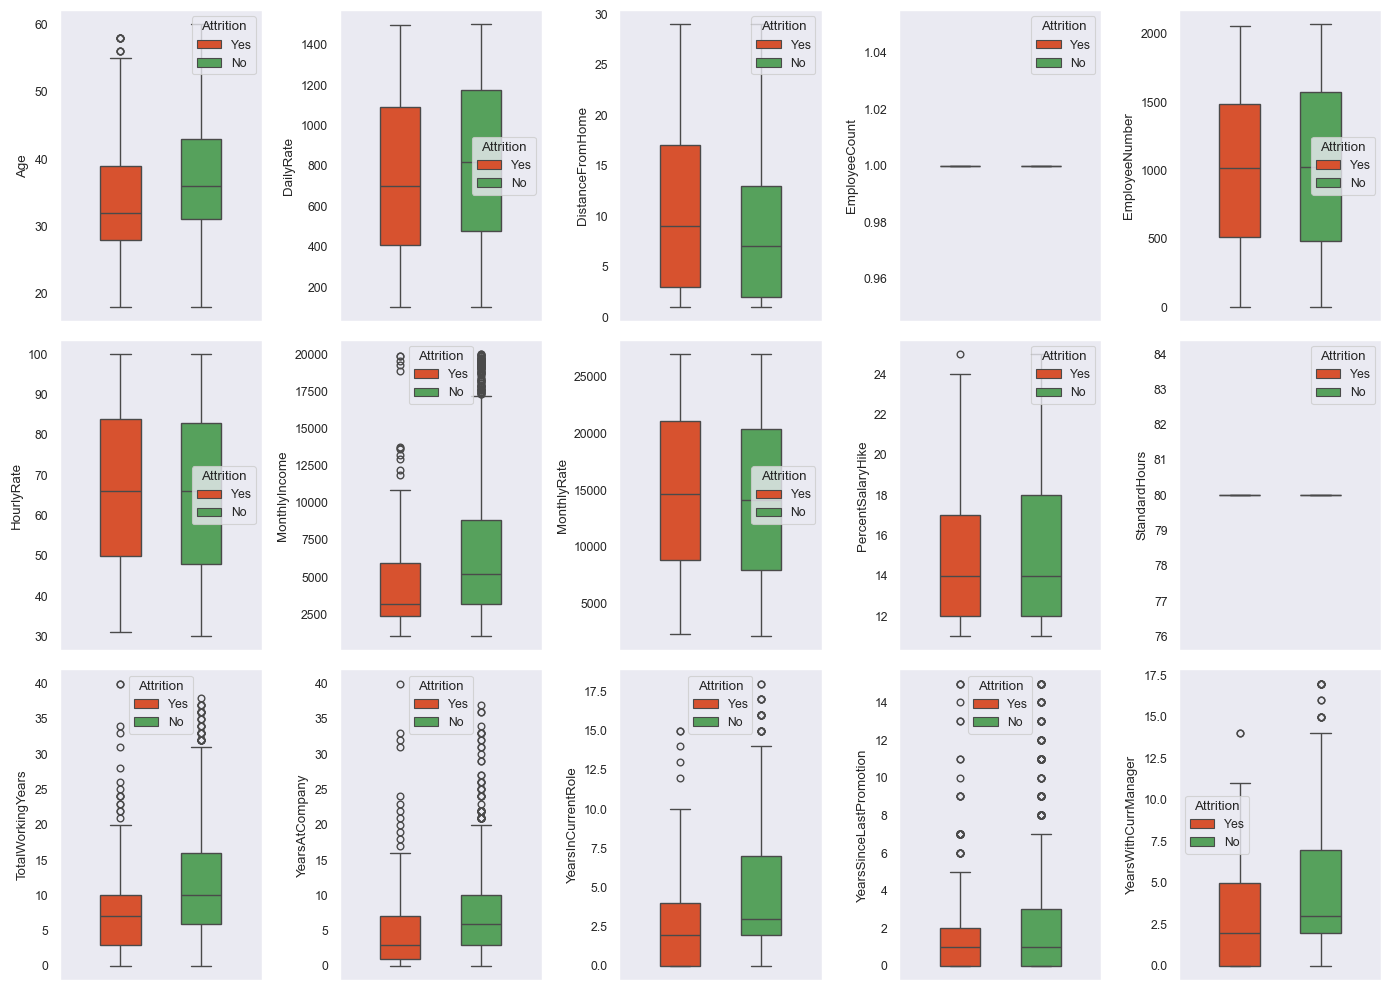

In [605]:
# Numerical Columns Vs. Attrition
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(14, 10))

for ax, n in zip(axes.flat, numerical):
    sns.boxplot(data=data, hue='Attrition', palette={'Yes': '#F34213', 'No':'#4AAD52'}, y=n ,ax=ax, gap=0.5)
    ax.grid(False)
    
plt.tight_layout()
plt.show()

What's wrong with `StandardHours` and `EmployeeCount` variables?

In [606]:
data[['EmployeeCount', 'StandardHours']].describe()

,EmployeeCount,StandardHours
count,1470.0,1470.0
mean,1.0,80.0
std,0.0,0.0
min,1.0,80.0
25%,1.0,80.0
50%,1.0,80.0
75%,1.0,80.0
max,1.0,80.0


Each employee's data for `EmployeeCount` and `StandardHours` exclusively consisted of singular values, with `EmployeeCount` consistently at 1 and `StandardHours` consistently at 80.

In [607]:
numerical.remove('EmployeeCount')
numerical.remove('StandardHours')

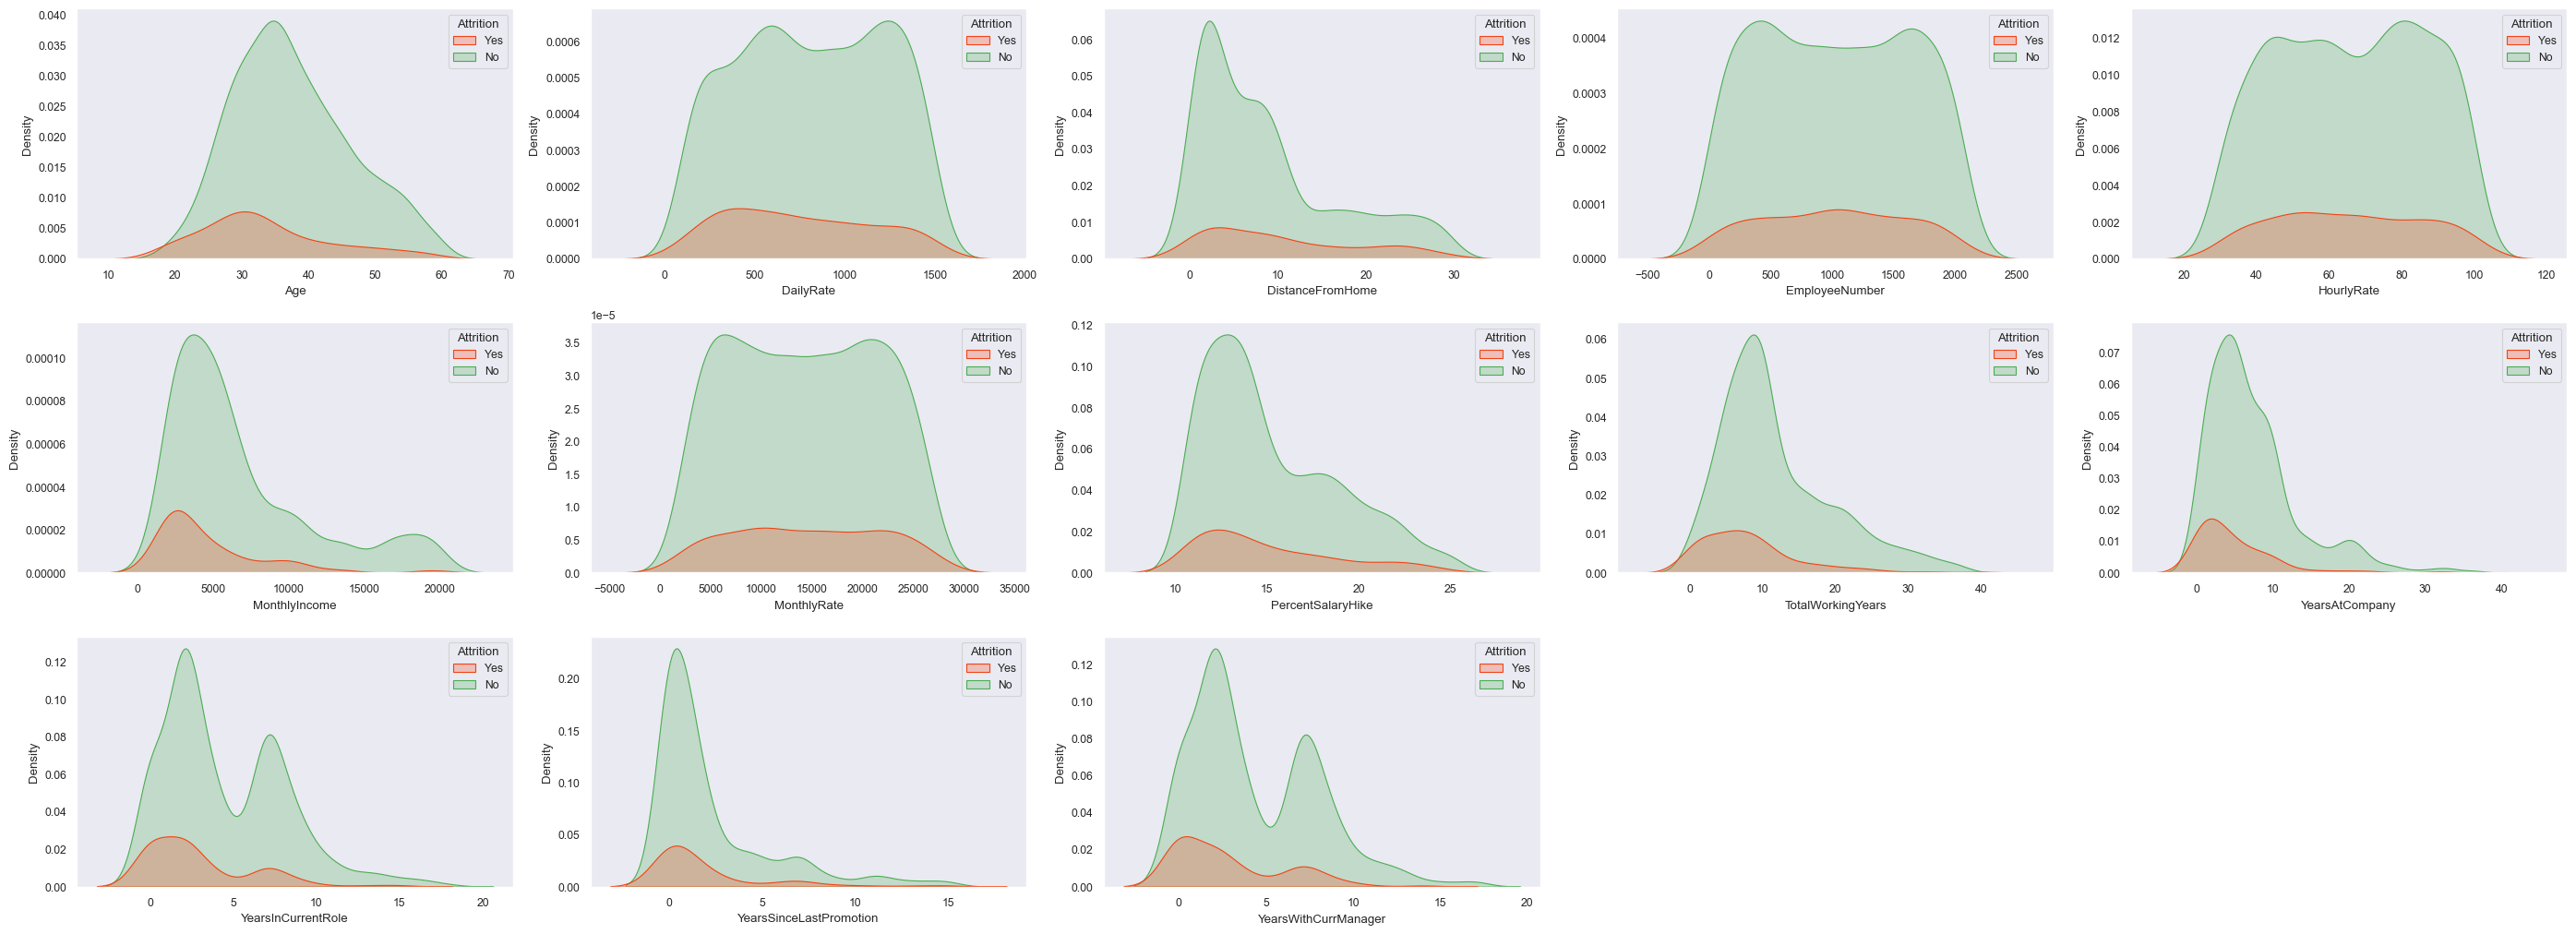

In [608]:
plt.figure(figsize=(28, 20))
for i in range(0, len(numerical)):
    plt.subplot(6, 5, i+1)
    sns.kdeplot(data=data, x=numerical[i], fill=True, hue='Attrition', palette={'Yes': '#F34213', 'No':'#4AAD52'})
    plt.grid(False)

plt.tight_layout()
plt.show()

To examine the attrition variable, we have divided the data into two categories: "Yes" and "No." Given that most numerical variables do not exhibit a normal distribution and the sample sizes between the two groups differ, we will use the Wilcoxon test to determine if there are any statistically significant differences between the two groups.

In [609]:
def perform_wilcoxon(variable):
    group_yes = data[data['Attrition'] == 'Yes'][variable]
    group_no = data[data['Attrition'] == 'No'][variable]
    statistic, p_value = stats.ranksums(group_yes, group_no)

    return (statistic, p_value)

In [610]:
p_numerical_values = []
for n in numerical:
    p_numerical_values.append(perform_wilcoxon(n)[1])

To prevent Type 1 error, we will correct the significance level to draw conclusion

In [611]:
from statsmodels.stats.multitest import multipletests

rejected, pvals_adjusted, alpha_bonferroni, alpha_sidak = multipletests(p_numerical_values, alpha=0.05, method='s')

# Print the results
print("Rejected hypotheses:", rejected)
print("Adjusted p-values:", pvals_adjusted)
print("Bonferroni-corrected significance level:", alpha_bonferroni)
print("Šidák-corrected significance level:", alpha_sidak)

Rejected hypotheses: [ True False  True False False  True False False  True  True  True False
  True]
Adjusted p-values: [7.07982124e-10 3.17884117e-01 3.16703713e-02 9.99999767e-01
 9.99999999e-01 3.83363592e-13 9.99975921e-01 9.97452060e-01
 3.57761239e-13 4.57709011e-12 1.08064949e-10 4.85846038e-01
 4.04136354e-10]
Bonferroni-corrected significance level: 0.0039378642276444165
Šidák-corrected significance level: 0.0038461538461538464


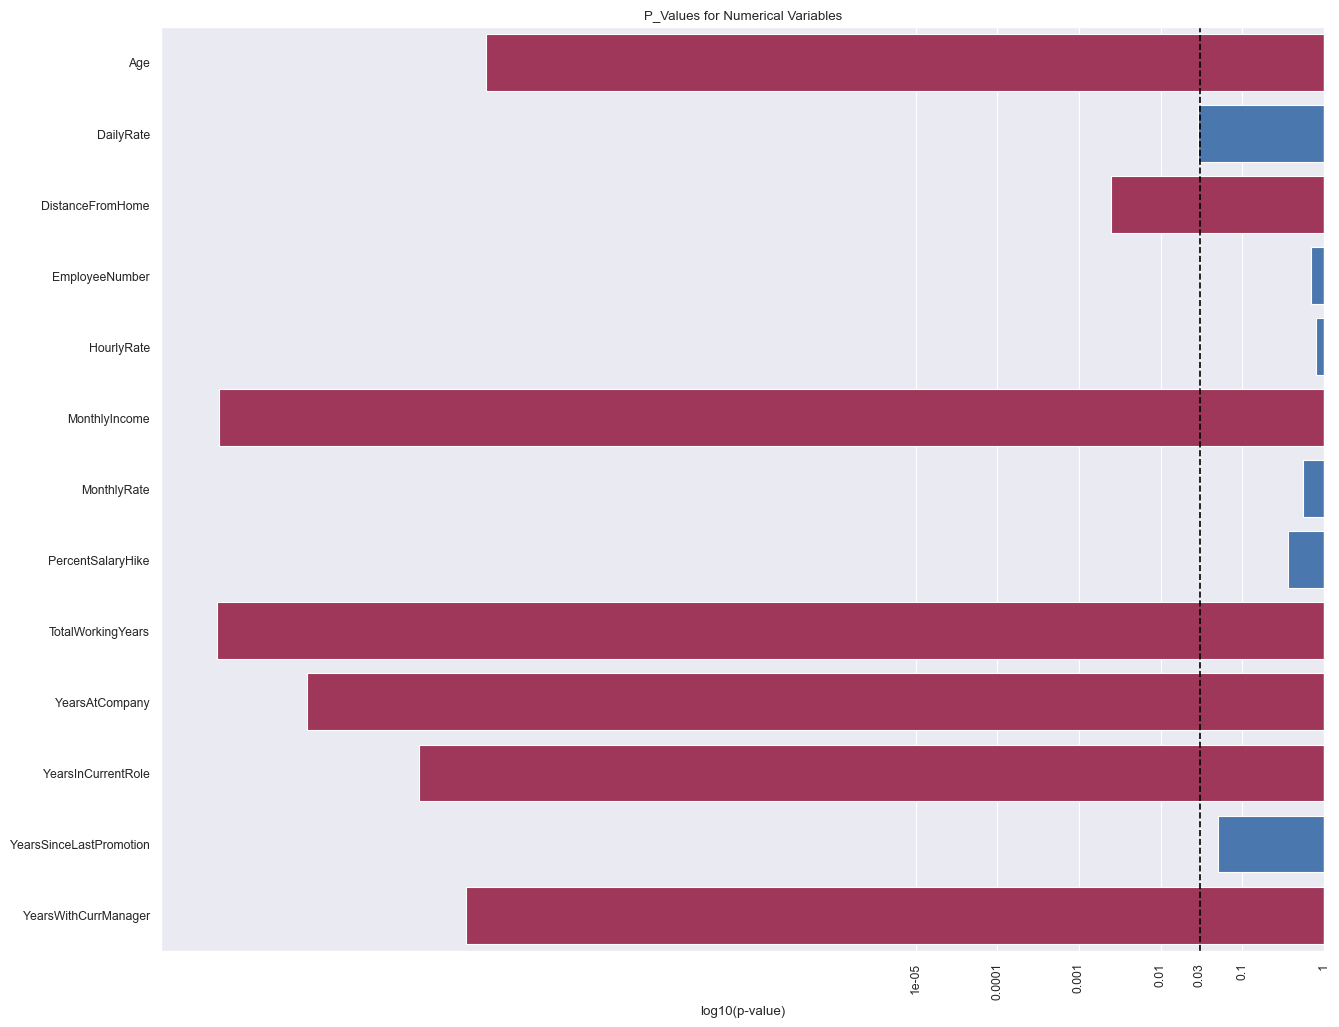

In [612]:
plt.figure(figsize=(15,12))
sns.barplot(y=numerical, x=np.log10(p_numerical_values), hue=numerical, palette=['#AF2655' if p < alpha_sidak else '#3876BF' for p in p_numerical_values], orient='horizontal')
# Add a horizontal line for significance level
plt.axvline(x=np.log10(0.03), color='black', linestyle='--')
# Set the y-axis label and ticks
plt.title('P_Values for Numerical Variables')
plt.xlabel('log10(p-value)')
plt.xticks(np.log10([0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 1]), [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 1], rotation=90)
plt.show()

A $p$-value  of 0.03 is used to identify variables that significantly distinguish the attrition group.

When the graph was analyzed, statistically significant differences were found between the "Yes" and "No" (by Attrition) groups in the following variables: Age, Daily Rate, Distance from Home, Monthly Income, Total Working Years, Years at Company, Years in Current Role, and Years with Current Manager.

For example, by looking at kdeplot or boxplot Employees who stay at the company tend to earn higher monthly salaries, with salaries up to 20,000 being more common among this group compared to those who leave. 

In [613]:
# Deleting not significant numerical variables
for col in ['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike', 'YearsSinceLastPromotion']:
    numerical.remove(col)

### Analysing Categorical Variables

Let's see the categorical data and mapping the Attrition as follow: Yes: 1 and No:0

In [614]:
categorical_variable = data.loc[:, categorical+['Attrition']].copy().replace({'Attrition': {'Yes':1, 'No':0}})
categorical_variable.head()

,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,Sales,Life Sciences,Female,Sales Executive,Single,Yes,1
1,Research & Development,Life Sciences,Male,Research Scientist,Married,No,0
2,Research & Development,Other,Male,Laboratory Technician,Single,Yes,1
3,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,0
4,Research & Development,Medical,Male,Laboratory Technician,Married,No,0


In [615]:
# Function to calculate attrition rate by a determined variable
def attrition_rate(variable):
    return pd.DataFrame(categorical_variable.groupby(variable)['Attrition']
                        .mean().sort_values(ascending=False)
                        .reset_index())

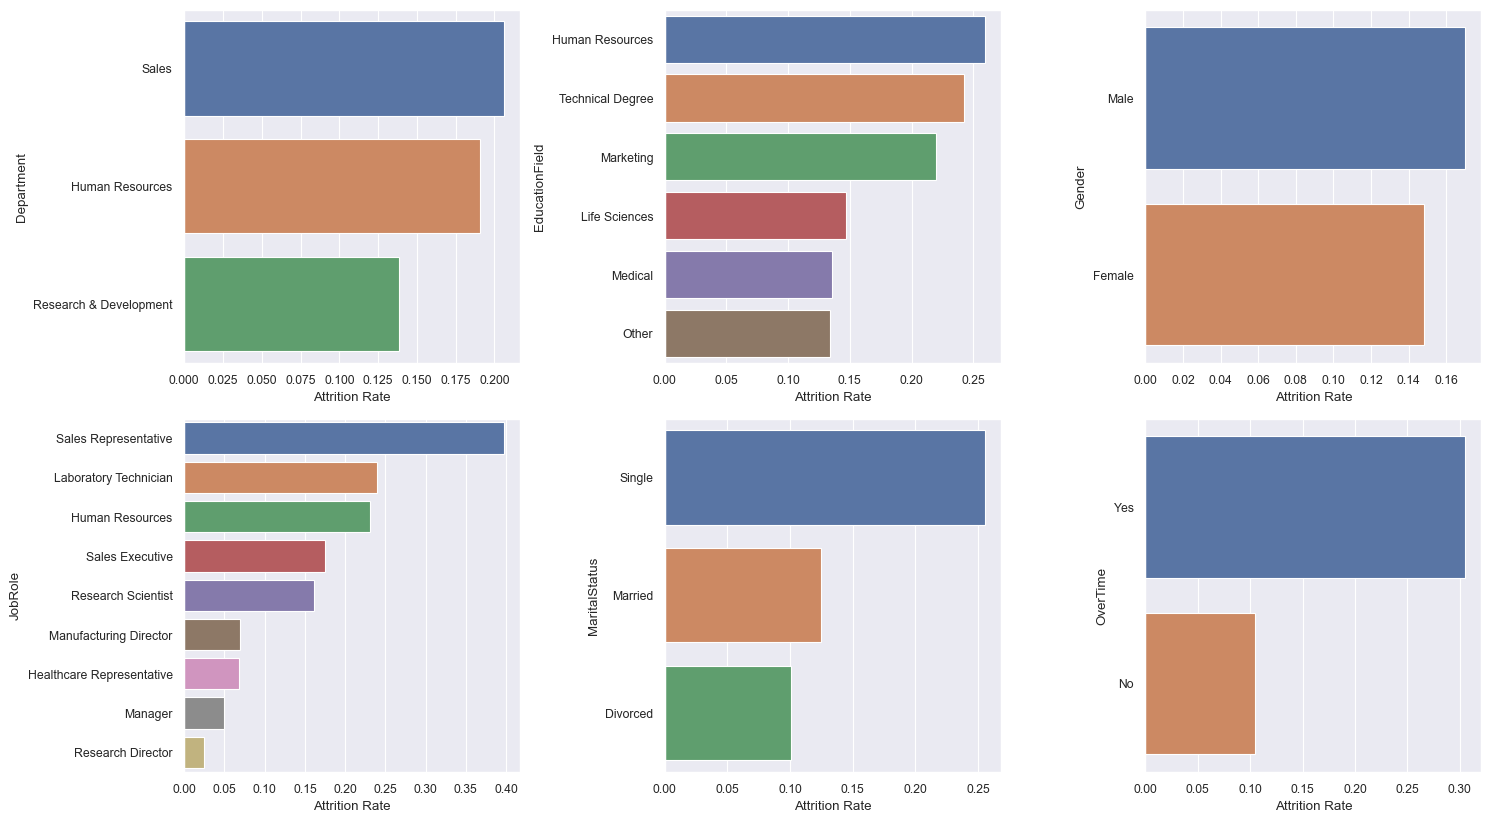

In [616]:
plt.figure(figsize=(15,12))
for i, col in enumerate(categorical):
    plt.subplot(3, 3, i+1) 
    sns.barplot(data=attrition_rate(col), x='Attrition', y=col, hue=col, orient='horizontal')
    plt.xlabel('Attrition Rate')
plt.tight_layout()
plt.show()

#### Chi-Squared Test
> [A chi-squared test]((https://en.wikipedia.org/wiki/Chi-squared_test)) (also chi-square or χ2 test) is a statistical hypothesis test used in the analysis of contingency tables when the sample sizes are large. In simpler terms, this test is primarily used to examine whether two categorical variables (two dimensions of the contingency table) are independent in influencing the test statistic (values within the table). 

Next, I will perform a chi-squared test to examine the relationship between each categorical variable and the attrition variable. This test will help us determine which variables have a significant relationship with attrition and which ones do not.

$H_0:$ The variable and `Attrition` variable are independent  
$H_A:$ The variable and `Attrition` variable are not independent

In [617]:
p_categorical_values = []
for col in categorical:
    table = pd.crosstab(data['Attrition'], data[col])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    p_categorical_values.append(p)

Now, we will adjust the significance level because we have already perform multiple chi-square tests above so that we can prevent type I error

In [618]:
rejected, pvals_adjusted, alpha_bonferroni, alpha_sidak = multipletests(p_categorical_values, alpha=0.05, method='s')

# Print the results
print("Rejected hypotheses:", rejected)
print("Adjusted p-values:", pvals_adjusted)
print("Bonferroni-corrected significance level:", alpha_bonferroni)
print("Šidák-corrected significance level:", alpha_sidak)

Rejected hypotheses: [ True  True False  True  True  True]
Adjusted p-values: [2.68482702e-02 3.99617640e-02 8.72518166e-01 1.65148898e-14
 5.67330663e-10 4.89505423e-20]
Bonferroni-corrected significance level: 0.008512444610847103
Šidák-corrected significance level: 0.008333333333333333


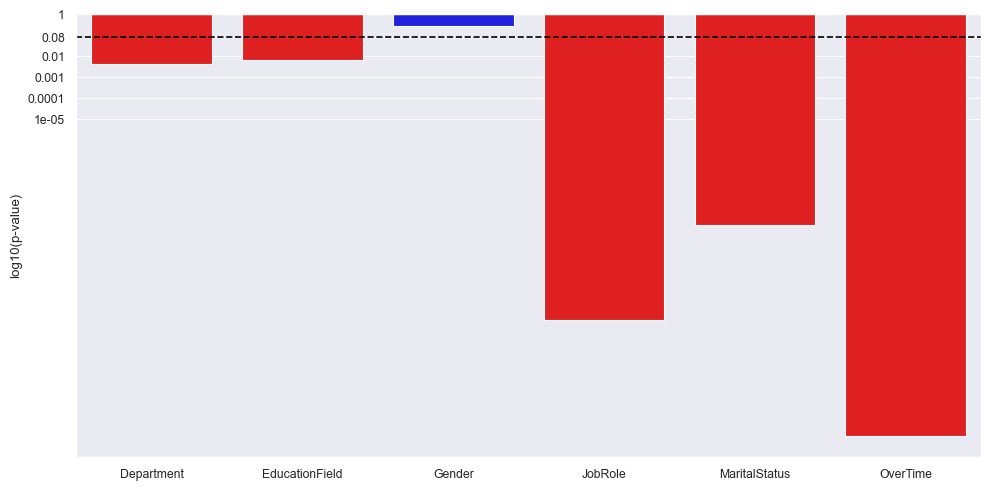

In [619]:
plt.figure(figsize=(10, 5))

# Create a bar plot with seaborn
sns.barplot(x=categorical, y=np.log10(p_categorical_values), hue=categorical, palette=['red' if p < alpha_sidak else 'blue' for p in p_categorical_values])

# Add a horizontal line for significance level
plt.axhline(y=np.log10(0.08), color='black', linestyle='--')

# Set the y-axis label and ticks
plt.ylabel('log10(p-value)')
plt.yticks(np.log10([0.00001, 0.0001, 0.001, 0.01, 0.08, 1]), [0.00001, 0.0001, 0.001, 0.01, 0.08, 1])

# Show the plot
plt.tight_layout()
plt.show()

 - Variables with a p-value below $0.0833...$ indicate a significant relationship with the "Attrition" variable.
- Rejection of the null hypothesis ($H_0$) implies that these variables are not independent of "Attrition".
- If the "Gender" variable has a p-value above $0.08333...$, it suggests independence from the "Attrition" variable.
- Lack of a significant relationship between gender and attrition implies no meaningful connection in a business context.

In [620]:
categorical.remove('Gender')

#### Correlation

To analyze ordinal variables, **correlation** is the most suitable analytical approach. However, since `Attrition` is a categorical variable, not numeric, correlation cannot be applied. One effective technique is to perform encoding preprocessing for the 'Attrition' values as follows: 'Yes' is encoded as 1, and 'No' is encoded as 0.

_Noted: 'Yes' value will be higher than 'No'_

In [621]:
encoded_data = data.copy().loc[:, categorical + ordinal +numerical + ['Attrition']].replace({"Attrition": {'Yes' : 1, 'No': 0}})
encoded_data.head()

,Department,EducationField,JobRole,MaritalStatus,OverTime,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,Sales,Life Sciences,Sales Executive,Single,Yes,1,2,2,3,2,4,8,3,1,0,0,1,41,1,5993,8,6,4,5,1
1,Research & Development,Life Sciences,Research Scientist,Married,No,2,1,3,2,2,2,1,4,4,1,3,3,49,8,5130,10,10,7,7,0
2,Research & Development,Other,Laboratory Technician,Single,Yes,1,2,4,2,1,3,6,3,2,0,3,3,37,2,2090,7,0,0,0,1
3,Research & Development,Life Sciences,Research Scientist,Married,Yes,2,4,4,3,1,3,1,3,3,0,3,3,33,3,2909,8,8,7,0,0
4,Research & Development,Medical,Laboratory Technician,Married,No,1,1,1,3,1,2,9,3,4,1,3,3,27,2,3468,6,2,2,2,0


In [622]:
#  Correlation Analysis
p_correlation_values = []
correlation_values = []

for col in ordinal: 
    corr = round(stats.pearsonr(encoded_data[col], encoded_data['Attrition'])[0], 3)
    p_value = stats.pearsonr(encoded_data[col], encoded_data['Attrition'])[1]
    p_correlation_values.append(p_value)
    correlation_values.append(corr)

In [623]:
correlation_df = pd.DataFrame({
    'ordinal' : ordinal,
    'correlation' : correlation_values, 
    'p_values' : np.round(p_correlation_values, 6)
}).sort_values(ascending=False, by='correlation')
correlation_df

,ordinal,correlation,p_values
0,BusinessTravel,0.127,0.000001
6,NumCompaniesWorked,0.043,0.095525
7,PerformanceRating,0.003,0.911884
1,Education,-0.031,0.229315
8,RelationshipSatisfaction,-0.046,0.078714
10,TrainingTimesLastYear,-0.059,0.022578
11,WorkLifeBalance,-0.064,0.014211
2,EnvironmentSatisfaction,-0.103,0.000072
5,JobSatisfaction,-0.103,0.000070
3,JobInvolvement,-0.130,0.000001


In [624]:
rejected, pvals_adjusted, alpha_bonferroni, alpha_sidak = multipletests(p_correlation_values, alpha=0.05, method='s')

# Print the results
print("Rejected hypotheses:", rejected)
print("Adjusted p-values:", pvals_adjusted)
print("Bonferroni-corrected significance level:", alpha_bonferroni)
print("Šidák-corrected significance level:", alpha_sidak)

Rejected hypotheses: [ True False  True  True  True  True False False False  True False False]
Adjusted p-values: [1.24016606e-05 9.56094240e-01 8.60341187e-04 6.81245716e-06
 8.15446173e-10 8.44840694e-04 7.00251307e-01 1.00000000e+00
 6.26116973e-01 1.56121684e-06 2.39704088e-01 1.57815349e-01]
Bonferroni-corrected significance level: 0.004265318777560645
Šidák-corrected significance level: 0.004166666666666667


In [625]:
correlation_df['Significance'] = np.where(correlation_df['p_values'] < alpha_sidak, 
                                          'Significance', 
                                          'Not-Significance')
correlation_df

,ordinal,correlation,p_values,Significance
0,BusinessTravel,0.127,0.000001,Significance
6,NumCompaniesWorked,0.043,0.095525,Not-Significance
7,PerformanceRating,0.003,0.911884,Not-Significance
1,Education,-0.031,0.229315,Not-Significance
8,RelationshipSatisfaction,-0.046,0.078714,Not-Significance
10,TrainingTimesLastYear,-0.059,0.022578,Not-Significance
11,WorkLifeBalance,-0.064,0.014211,Not-Significance
2,EnvironmentSatisfaction,-0.103,0.000072,Significance
5,JobSatisfaction,-0.103,0.000070,Significance
3,JobInvolvement,-0.130,0.000001,Significance


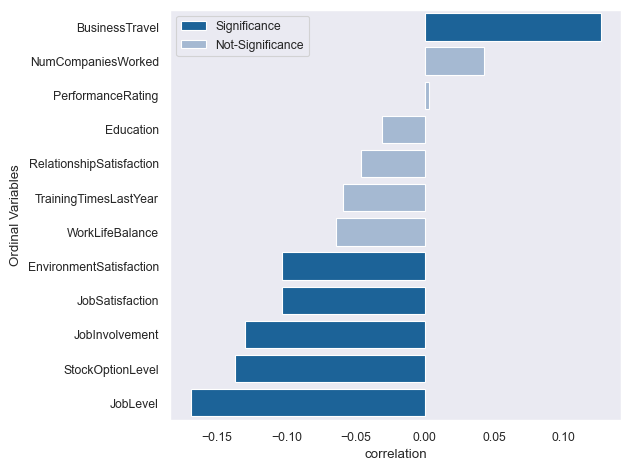

In [626]:
sns.barplot(data=correlation_df, y='ordinal', x='correlation', 
            hue='Significance', palette={'Significance':'#0766AD', 'Not-Significance':'#9EB8D9'})
plt.legend()
plt.ylabel('Ordinal Variables')
plt.grid(False)
plt.tight_layout()
plt.show()

- This shows that `business travel` and attrition are positively correlated. Employees who travel often have a higher chance of leaving the company. 
- Employees with higher `job levels` are more likely to remain with the company, resulting in a negative correlation between job level and attrition. This correlation is the strongest among the variables examined.

In [627]:
## Removing not significant variables
for col in ['NumCompaniesWorked', 'PerformanceRating', 'Education', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance']:
    if col in ordinal:
        ordinal.remove(col)

## Clustering

- In this section I want to implement clustering algorithm, K-Means to uncover hidden insight that could be meaningful from the HR data.
- We will focus on the numerical, ordinal variables.

In [628]:
seg = encoded_data[numerical + ordinal + ['Attrition']].copy()
seg.head() 

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,Attrition
0,41,1,5993,8,6,4,5,1,2,3,2,4,0,1
1,49,8,5130,10,10,7,7,2,3,2,2,2,1,0
2,37,2,2090,7,0,0,0,1,4,2,1,3,0,1
3,33,3,2909,8,8,7,0,2,4,3,1,3,0,0
4,27,2,3468,6,2,2,2,1,1,3,1,2,1,0


Step-by-Step of Clustering
- Preprocessing all of the `seg` dataframe values to be standard-scaling
- Elbow Plot for choosing the best number clusters, __`k`__

In [629]:
scaler = StandardScaler()
standardized_seg = seg.copy()

for col in seg.columns:
    scaler.fit(standardized_seg[[col]])
    standardized_seg[col] = scaler.transform(standardized_seg[[col]])

standardized_seg.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,Attrition
0,0.446350,-1.010909,-0.108350,-0.421642,-0.164613,-0.063296,0.245834,-0.162399,-0.660531,0.379672,-0.057788,1.153254,-0.932014,2.280906
1,1.322365,-0.147150,-0.291719,-0.164511,0.488508,0.764998,0.806541,1.717339,0.254625,-1.026167,-0.057788,-0.660853,0.241988,-0.438422
2,0.008343,-0.887515,-0.937654,-0.550208,-1.144294,-1.167687,-1.155935,-0.162399,1.169781,-1.026167,-0.961486,0.246200,-0.932014,2.280906
3,-0.429664,-0.764121,-0.763634,-0.421642,0.161947,0.764998,-1.155935,1.717339,1.169781,0.379672,-0.961486,0.246200,-0.932014,-0.438422
4,-1.086676,-0.887515,-0.644858,-0.678774,-0.817734,-0.615492,-0.595227,-0.162399,-1.575686,0.379672,-0.961486,-0.660853,0.241988,-0.438422


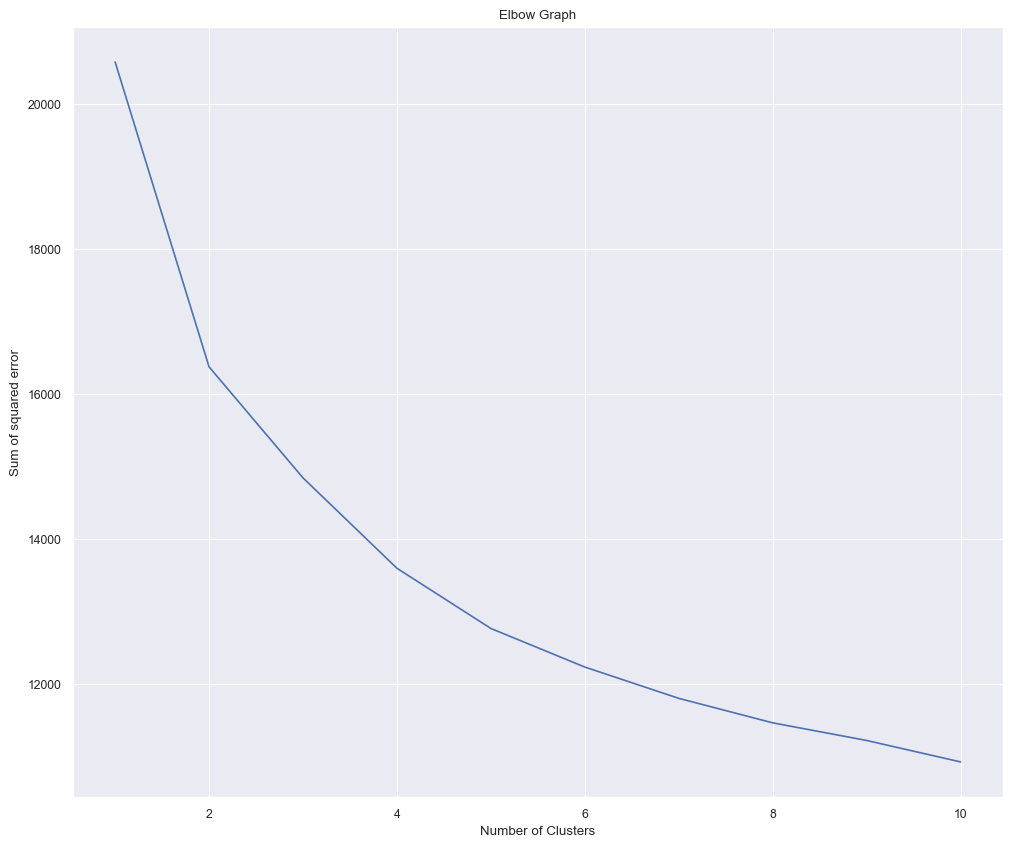

In [630]:
# Using elbow method to find optimal number of clustering
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=0)
    km.fit(standardized_seg)
    sse.append(km.inertia_)

plt.figure(figsize=(12,10))
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse);

It appears that $k = 2$ is the optimal number of clusters

In [631]:
km = KMeans(n_init=10, n_clusters=2)
y_predicted = km.fit_predict(standardized_seg)
y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [632]:
standardized_seg['Cluster'] = y_predicted
standardized_seg.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,Attrition,Cluster
0,0.446350,-1.010909,-0.108350,-0.421642,-0.164613,-0.063296,0.245834,-0.162399,-0.660531,0.379672,-0.057788,1.153254,-0.932014,2.280906,1
1,1.322365,-0.147150,-0.291719,-0.164511,0.488508,0.764998,0.806541,1.717339,0.254625,-1.026167,-0.057788,-0.660853,0.241988,-0.438422,0
2,0.008343,-0.887515,-0.937654,-0.550208,-1.144294,-1.167687,-1.155935,-0.162399,1.169781,-1.026167,-0.961486,0.246200,-0.932014,2.280906,1
3,-0.429664,-0.764121,-0.763634,-0.421642,0.161947,0.764998,-1.155935,1.717339,1.169781,0.379672,-0.961486,0.246200,-0.932014,-0.438422,1
4,-1.086676,-0.887515,-0.644858,-0.678774,-0.817734,-0.615492,-0.595227,-0.162399,-1.575686,0.379672,-0.961486,-0.660853,0.241988,-0.438422,1


In [633]:
seg['Cluster'] = y_predicted
seg.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,Attrition,Cluster
0,41,1,5993,8,6,4,5,1,2,3,2,4,0,1,1
1,49,8,5130,10,10,7,7,2,3,2,2,2,1,0,0
2,37,2,2090,7,0,0,0,1,4,2,1,3,0,1,1
3,33,3,2909,8,8,7,0,2,4,3,1,3,0,0,1
4,27,2,3468,6,2,2,2,1,1,3,1,2,1,0,1


In [634]:
cluster_result = round((seg.groupby('Cluster').mean()), 1).T
cluster_result

Cluster,0,1
Age,43.2,34.2
DistanceFromHome,9.1,9.2
MonthlyIncome,11550.8,4339.6
TotalWorkingYears,19.6,7.7
YearsAtCompany,13.0,4.4
YearsInCurrentRole,7.6,2.8
YearsWithCurrManager,7.3,2.8
BusinessTravel,1.0,1.1
EnvironmentSatisfaction,2.8,2.7
JobInvolvement,2.7,2.7


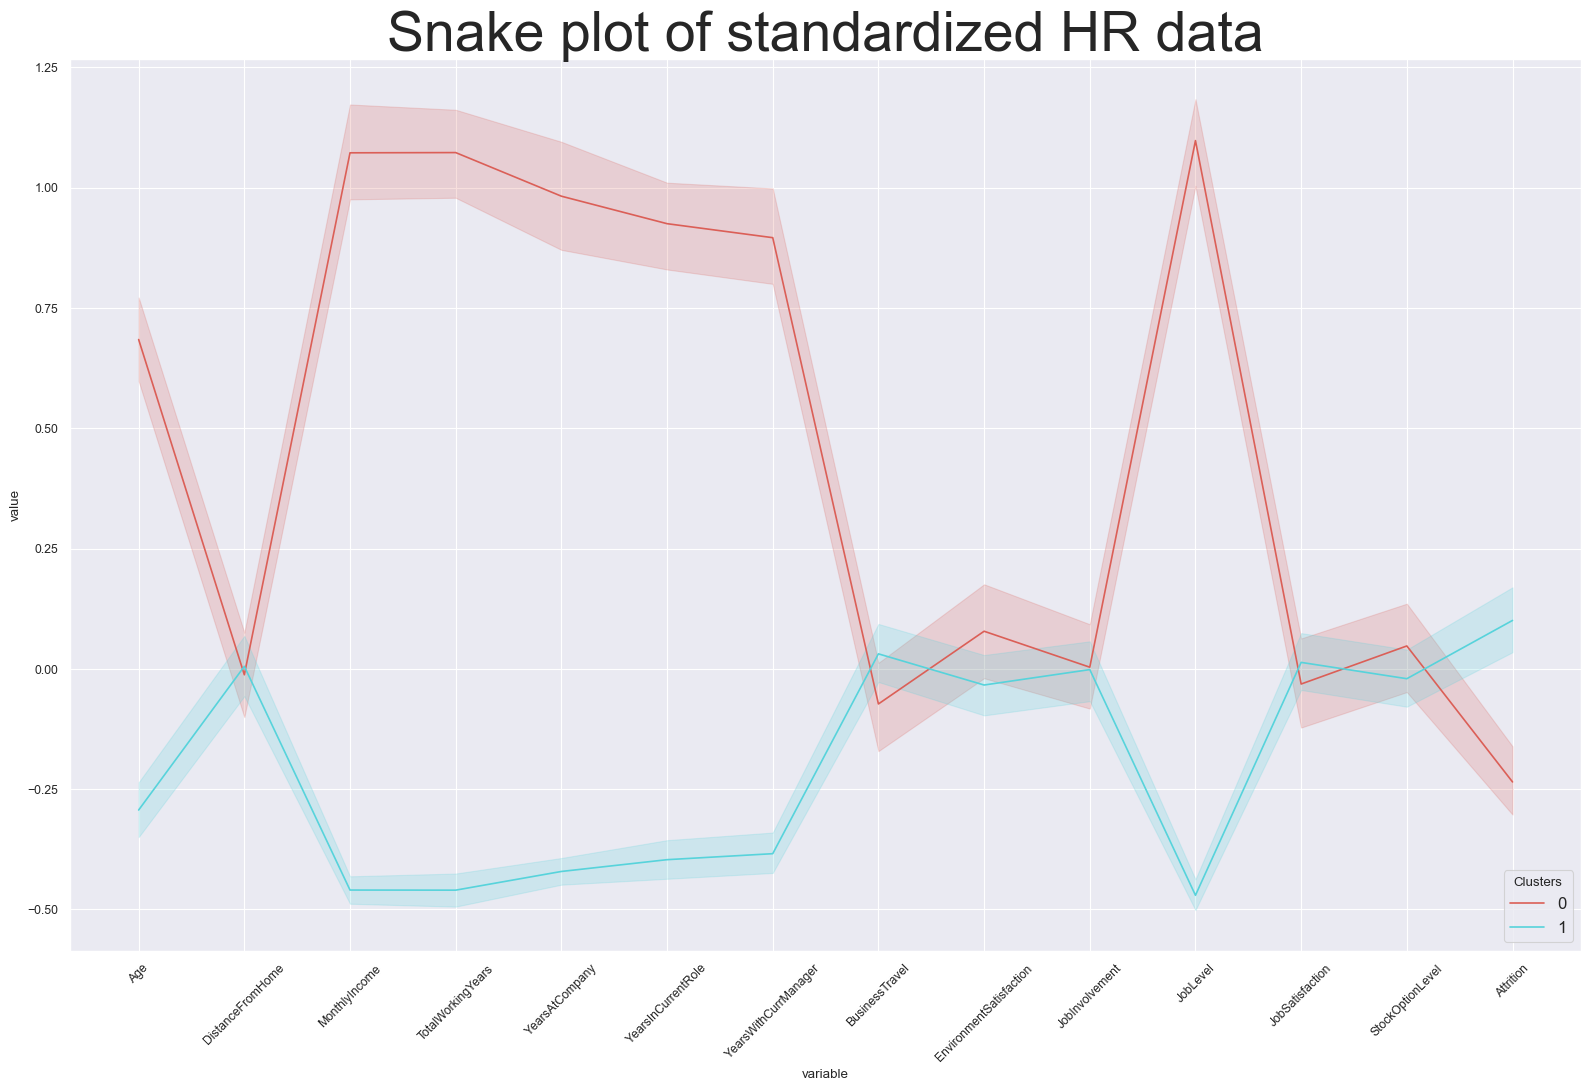

In [635]:
standardized_seg_melt = pd.melt(standardized_seg, id_vars=['Cluster'])
plt.figure(figsize=(16,11))
sns.lineplot(data=standardized_seg_melt, x='variable', y='value', hue='Cluster', palette='hls')
plt.title("Snake plot of standardized HR data", fontsize=40)
plt.xticks(rotation=45)
plt.legend(loc='lower right',fontsize=12, title='Clusters')
plt.tight_layout()
plt.show()

We can see from the snake plot most of the cluster 0 variables are higher than cluster 1

By examining factors like age (42.8 vs 34.2), years of experience (19.2 vs 7.7), years at company, and monthly income ($11,176 vs $4,367), it's clear that group 0 has higher values than group 1. This suggests that group 0 consists of more experienced employees than group 1. To easily distinguish between these two groups, we can label group 1 as "associate" and group 0 as "senior." Additionally, the "associate" group has a higher attrition rate than the "senior" group.

In [636]:
# mapping cluster 0 to senior, cluster 1 to associate
encoded_data['Cluster'] = np.where(y_predicted == 0, 'senior', 'associate')
encoded_data.head()

,Department,EducationField,JobRole,MaritalStatus,OverTime,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition,Cluster
0,Sales,Life Sciences,Sales Executive,Single,Yes,1,2,2,3,2,4,8,3,1,0,0,1,41,1,5993,8,6,4,5,1,associate
1,Research & Development,Life Sciences,Research Scientist,Married,No,2,1,3,2,2,2,1,4,4,1,3,3,49,8,5130,10,10,7,7,0,senior
2,Research & Development,Other,Laboratory Technician,Single,Yes,1,2,4,2,1,3,6,3,2,0,3,3,37,2,2090,7,0,0,0,1,associate
3,Research & Development,Life Sciences,Research Scientist,Married,Yes,2,4,4,3,1,3,1,3,3,0,3,3,33,3,2909,8,8,7,0,0,associate
4,Research & Development,Medical,Laboratory Technician,Married,No,1,1,1,3,1,2,9,3,4,1,3,3,27,2,3468,6,2,2,2,0,associate


In [637]:
encoded_data['Cluster'].value_counts()

Cluster
associate    1029
senior        441
Name: count, dtype: int64

In [638]:
categorical.append('Cluster')

### Building Classification Machine Learning Model

We'll use a random forest classifier because our data is imbalanced. Random forest, as an ensemble method, is good for dealing with such cases.

In [ ]:
def predicting(Model):
    # Preprocessing Data
    ## One Hot Encoding
    encoded_categorical = pd.get_dummies(encoded_data[categorical], drop_first=True).replace({False:0, True:1}).to_numpy()

    # Normalization Ordinal Variables
    scaler = MinMaxScaler()
    scaler.fit(encoded_data[ordinal])
    normalized_data = scaler.fit_transform(encoded_data[ordinal])

    # Standardization Numerical Variables
    scaler = StandardScaler()
    scaler.fit(encoded_data[numerical])
    standardized_data = scaler.fit_transform(encoded_data[numerical])

    # Combining Types of Data
    X = np.hstack((encoded_categorical, normalized_data, standardized_data))
    y = encoded_data['Attrition']

    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Random Forest
    clf = Model(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    ## Predicting test data
    y_pred = clf.predict(X_test)

    ## Evaluation of Model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score:', f1_score(y_test, y_pred))
    

In [639]:
# One Hot Encoding
encoded_categorical = pd.get_dummies(encoded_data[categorical], drop_first=True).replace({False:0, True:1}).to_numpy()
encoded_categorical.shape

(1470, 19)

Now we'll deal with ordinal variables

In [640]:
encoded_data[ordinal]

,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel
0,1,2,3,2,4,0
1,2,3,2,2,2,1
2,1,4,2,1,3,0
3,2,4,3,1,3,0
4,1,1,3,1,2,1
...,...,...,...,...,...,...
1465,2,3,4,2,4,1
1466,1,4,2,3,1,1
1467,1,2,4,2,2,1
1468,2,4,2,2,2,0


As we can see from above tables the values are varying scale such business travel has 1-3 values while NumCompanisWorked has 1-9 values. We need to normalization these values into 1-2 range. Normalization is used to preserve the ordinality of data

In [641]:
# Normalization Ordinal Variables
scaler = MinMaxScaler()
scaler.fit(encoded_data[ordinal])
normalized_data = scaler.fit_transform(encoded_data[ordinal])

In [642]:
normalized_data.shape

(1470, 6)

In [643]:
encoded_data[numerical]

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,5993,8,6,4,5
1,49,8,5130,10,10,7,7
2,37,2,2090,7,0,0,0
3,33,3,2909,8,8,7,0
4,27,2,3468,6,2,2,2
...,...,...,...,...,...,...,...
1465,36,23,2571,17,5,2,3
1466,39,6,9991,9,7,7,7
1467,27,4,6142,6,6,2,3
1468,49,2,5390,17,9,6,8


In [644]:
# Standardization Numerical Variables
scaler = StandardScaler()
scaler.fit(encoded_data[numerical])
standardized_data = scaler.fit_transform(encoded_data[numerical])

In [645]:
standardized_data.shape

(1470, 7)

In [646]:
X = np.hstack((encoded_categorical, normalized_data, standardized_data))
y = encoded_data['Attrition']

In [647]:
X.shape

(1470, 32)

In [648]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting test data
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8594104308390023
